In [1]:
import pandas as pd
import numpy as np
from kss import split_sentences
from pykospacing import Spacing
from hanspell import spell_checker
from konlpy.tag import Okt, Kkma, Hannanum, Komoran, Mecab
import re
from textrankr import TextRank
import matplotlib.pyplot as plt

### Dataset all load (학습데이터 제작)
 1. 전체 데이터 합침
 2. NULL 제거 (title 기준)
 3. 중복값 제거

In [123]:
file = pd.read_csv('title1.csv', encoding = 'utf-8-sig', names = ['Keyword'])

data=pd.DataFrame()
for name in file['Keyword']:
    try:
        temp = pd.read_csv("dataset/"+name + '.csv', encoding = 'utf-8-sig')
        if len(temp.columns)>9: # error 파일 체크
            print('col error:',name)
        if 'keyword' not in temp.columns:
            print('keyword error:',name)
        data=pd.concat([data,temp], ignore_index=True, axis=0)
    except:
        print('없는 파일:',name)

In [124]:
data.columns

Index(['Q_title', 'Q_content', 'A_content_1', 'A_content_2', 'A_content_3',
       'A_content_4', 'A_content_5', 'keyword', 'A_content_6'],
      dtype='object')

In [125]:
data['keyword'].isnull()[0]

False

In [126]:
data=data.dropna(subset=['Q_title']).reset_index(drop=True)

In [127]:
data

,Q_title,Q_content,A_content_1,A_content_2,A_content_3,A_content_4,A_content_5,keyword,A_content_6
0,강아지 불리불안…..강아지가 우리가 집에서 나갈때마다 심하게 짖으면서 우리 다리를 ...,NaN,"산책은 매일매일 시켜 주시고, 출근하는 분이라면 아침에 나가기 전에 산책시...",2일에 한번은 자주가 아닙니다.,강아지를 힘들게 하는 분리불안증 입니다. 안녕하세요. 저는 동물심리전문가이...,강아지불리불안증의 원인은 여러가지가 있습니다. 주인과 강아지간 서열정리가...,NaN,강아지 장애,NaN
1,분리불안 강아지 제가 공원에 버려져있는 강아지를 키우는 한 고등학생입니다버려져있는 ...,NaN,"안녕하세요.인터파크펫 반려동물 전문 톡집사 입니다. 개인적인 경험으로, 분리불안은 ...",다른 답변 여러가지 듣는것 보다 유튜브에서 강형욱씨 영상 찾아서 분리불안 고치세요,"유튜브에 ""세상에 나쁜 개는 없다""에 분리불안 치면 강아지 교육하는 것도 나와있으니...",분리불안증세 맞습니다. 우선 제가 운영하는 블로그와 포스트에 관련포스팅 링크 걸어...,NaN,강아지 장애,NaN
2,불리불안 강아지,1.불리불안이 심한 강아지 종류는 뭔가요?? 2.불리불안 강아지 종류는 다 불리불안...,"분리불안은 견종과 관계없이 타고난 성격과 주거 환경, 견주나 가족들의 보육...","우선 1,2번에 대해서 말씀드리자면 분리불안은 강아지 종류가 아니라 강아지...",NaN,NaN,NaN,강아지 장애,NaN
3,분리불안강아지 잠자리분리 질문이용,진도믹스 세살 제가 외출하면 하울링을 해서분리불안 훈련중인데하우스훈련이랑잠자리도 분...,근데 잠자리분리 훈련시에 제 침대에 올라오는것을아예 못하게해야하나요? 잘때...,안녕하세요.천만 반려인과 함께하는 애견 동반 여행 플랫폼 하트독 입니다. ...,NaN,NaN,NaN,강아지 장애,NaN
4,분리불안 강아지와 새로운 강아지,4년 동안 고양이와 같이 살았던 강아지가 고양이랑 떨어지면서 분리불안이 생긴 것 같...,이사하고 스트레스를 보이는 강아지죠?지금 그 아이도 적응해야 하는데.. 새...,강아지 한 마리 더 키우기 안녕하세요. 저는 동물심리 전문가이며 애견훈련...,NaN,NaN,NaN,강아지 장애,NaN
...,...,...,...,...,...,...,...,...,...
86528,강아지가 심하게 많이 설사를 해요~,병원에 가서 분변세균도말검사랑 파보장염검사랑 Giardia분변검사를 다 해봤거든요~...,1.맨 윗부분에 써있는 약을 먹었는데도 왜설사가 점점 심해지는지...한방울 싸고 3...,1.기생충약을 먹이셨을때.. 설사하는 경우가 있읍니다. - 말하자면 안에 있는 모든...,혹시 장염이 아닐까요~?아직 아기강아지가 설사를 하면 그건 큰일이거든요!첫번째로~ ...,NaN,NaN,핥는 강아지,NaN
86529,강아지 얼굴 상처저희 강아지가 땅바닥이나 손 핥는 걸 좋아하는데 오늘 보니 얼굴 왼...,NaN,안녕하세요. 부천 하모니동물병원 원장 하모니카입니다.설명 내용과 사진만 보면서 추정...,NaN,NaN,NaN,NaN,핥는 강아지,NaN
86530,새끼강아지가 자꾸 달려들어요.,2개월 말티즈 키우고있습니다. 가끔씩 제 다리위에서 자기도 하고 제가 무릎꿇고있으면...,안녕하세요.천만 반려인과 함께하는 애견 동반 여행 플랫폼 하트독 입니다. ...,아기 강아지 들은 이갈이를 하기 때문에그런걸수도 있습니다.저도 정확한 시기...,NaN,NaN,NaN,핥는 강아지,NaN
86531,강아지 발바닥에 뭔가요?,강아지가 매일 발바닥을 핥아요 5분정도 계속 끊임없이 핥더라구요 그래서 발바닥 봤는...,상처가 있거나 할 수 있습니다. 자세히 살펴 보시고요 혹 가시같은게 박혀있...,강아지가 발을 햝거나 물어뜯어면 뭐가 박혀 있거나 그게 아니면 습진 문제일...,불편한가 본데요? 계속 핥을시 습진이 생길 수 있습니다.,NaN,NaN,핥는 강아지,NaN


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86533 entries, 0 to 86532
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q_title      86533 non-null  object
 1   Q_content    78193 non-null  object
 2   A_content_1  86519 non-null  object
 3   A_content_2  56718 non-null  object
 4   A_content_3  33703 non-null  object
 5   A_content_4  19159 non-null  object
 6   A_content_5  10532 non-null  object
 7   keyword      86533 non-null  object
 8   A_content_6  2 non-null      object
dtypes: object(9)
memory usage: 5.9+ MB


In [129]:
# 1:1 대응을 위해 A_content_1 개수로 맞추기
data=data.dropna(subset=['A_content_1']).reset_index(drop=True)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86519 entries, 0 to 86518
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q_title      86519 non-null  object
 1   Q_content    78180 non-null  object
 2   A_content_1  86519 non-null  object
 3   A_content_2  56711 non-null  object
 4   A_content_3  33698 non-null  object
 5   A_content_4  19155 non-null  object
 6   A_content_5  10529 non-null  object
 7   keyword      86519 non-null  object
 8   A_content_6  2 non-null      object
dtypes: object(9)
memory usage: 5.9+ MB


In [131]:
# 중복되는 데이터 지우기(한 행의 모든 열이 같으면..)
data.duplicated(data.columns).sum()

11201

In [132]:
data=data.drop_duplicates(data.columns, keep='first').reset_index(drop=True)

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75318 entries, 0 to 75317
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q_title      75318 non-null  object
 1   Q_content    67842 non-null  object
 2   A_content_1  75318 non-null  object
 3   A_content_2  45783 non-null  object
 4   A_content_3  25631 non-null  object
 5   A_content_4  13922 non-null  object
 6   A_content_5  7454 non-null   object
 7   keyword      75318 non-null  object
 8   A_content_6  2 non-null      object
dtypes: object(9)
memory usage: 5.2+ MB


### 각 열별 데이터 정제

 1. 정규표현식으로 한글, 숫자, ., ? 정규화 하기
 2. hanspell 패키지를 이용하여 맞춤법 검사 돌리기

In [134]:
column=data.columns
for col in column:
    if col=='keyword':   # 키워드는 정제 안해도 됨
        continue
    for i in range(len(data[col])):
        if data[col].isnull()[i]:   # nan 값일 경우 pass
            continue
        try:
            norm = re.compile('[가-힣|0-9|.|?]+').findall(data.loc[i,col])
            st = ' '.join(norm)
            st2 = spell_checker.check(st)
            data.loc[i,col]=st2[2]
        except:
            print('index:',i,'col:',col)

index: 49972 col: Q_title
index: 10517 col: Q_content
index: 13461 col: Q_content
index: 33647 col: Q_content
index: 47513 col: Q_content
index: 70349 col: Q_content
index: 60667 col: A_content_1
index: 7865 col: A_content_2
index: 47388 col: A_content_2
index: 21876 col: A_content_3
index: 54186 col: A_content_3
index: 65849 col: A_content_4
index: 72349 col: A_content_4


In [211]:
index=72349
column='A_content_4'
data.loc[index,column]

'    여기이사진은,저희집강아지 튀김인데요>3<[이름이조금그렇죠ㅋㅋ]종류가토이푸들쪽입니다.전저희어머니친구의딸의친구분이키우던걸받았는데요.제가전부터말티즈같은조그만종류를키우고싶어했어요.근데어머니께말씀을들어보니까푸들이라고하시더라구요.그래서좀속상하구..괜히데려왓다하는생각이게속들더라구요.근데토요일날왔는데학교갔다오니까강아지가있길래어머니께이강아지냐구여쭤봣더니맞다구그러시더라구요. 생각보다많이귀여웠고, 애교도많았어요>3<그래서지금은말티즈보다푸들이더낫다고생각하네요. 저희튀김이는처음보는사람보고물지도않구요.말도잘듣고칭찬받을짓을많이해요.집에누가오면짖긴하지만요 ㅎㅎ.지금질문자님의글을보니까푸들이너무활발한탓에순하다는건보장을못해주신다고말씀하신것같은데요.활발하면산책같은데가도더뛰어놀고가만히앉아있는것보단좋을것같은데요?그리고강아지가활발해야지더재밌게키울수도잇죠 ㅋㅋ,그니까지금상황에서도푸들강추입니다! [푸들은집도잘지키는데다가,영리하고,똑똑하고훈련좀만받으면금방익힌답니다~] '

In [212]:
data.loc[index,column]=''

In [203]:
data.loc[index,column]=data.loc[index,column].replace("."," ")

In [165]:
data.drop([index], axis=0, inplace=True)

In [204]:
spacing = Spacing(rules=voca.index)
st=spacing(data.loc[index,column])
st

'함께 키워도 되여 키우실 때는 요 깨긋한 환경에서 키우시 구요 개목욕시켜도 냄새가 나면요 일단은 샴푸로만 하지 마시구 요 비누질하신 다음에 그다음에 샴퓨지를 해주시구요 목욕을 시켜주세요 개는 요 1주일에 한 번씩 구충제를 먹여야 되여 왜냐하면 요 몸 안에 기생충들이 잇잖아요 그것을 예방하고 치료해주는 거거든요 그리구요 개들 몸에 냄새가 나잖아요 그러면 이 제품을 사셔서   개몸에 뿌려주세요 도 그 죤에서 나왔는데요 살균도 그 죤 탈취제 제품 추천 해드릴께 요 이 제품은 요 개들 몸에 악취 제거해 주구요 향기를 유지시켜주는 제품입니다 개목욕시킬 실 때는 요 앤완견 전용을 쓰세요(단 사람들용 삼퓨로 목욕시키시키면 개피부병 유발) 그리구 요 맨 먼저 비누질을 해서 깨끗하게 문질려 주세요 그러면 개들 몸에 더려운 곳들이 빠져나오든 요 그 다음에 샴푸질해서 깨끗히 문지르신 다음에  깨끗하게 씻어주세요 그리 구목욕은 요 1주일에 두 번만 꼭 시켜주세요'

In [205]:
data.loc[index,column] = st

In [206]:
st2=spell_checker.check(data.loc[index,column])

In [207]:
st2[2]

'함께 키워도 돼요 키우실 때는 요 깨끗한 환경에서 키 우시 구요 개 목욕시켜도 냄새가 나면요 일단은 샴푸로만 하지 마시고 요 비누질하신 다음에 그다음에 샴푸 지를 해주시고요 목욕을 시켜주세요 개는 요 1주일에 한 번씩 구충제를 먹여야 돼요 왜냐하면 요 몸 안에 기생충들이 있잖아요 그것을 예방하고 치료해주는 거거든요 그리고요 개들 몸에 냄새가 나잖아요 그러면 이 제품을 사셔서   게 몸에 뿌려주세요 도 그 죤에서 나왔는데요 살균도 그 죤 탈취제 제품 추천해드릴게 요 이 제품은 요 개들 몸에 악취 제거해 주고요 향기를 유지시켜주는 제품입니다 개 목욕시킬 실 때는 요 애완견 전용을 쓰세요(단 사람들용 샴푸로 목욕 시 키 시키면 게 피부병 유발) 그리고 요 맨 먼저 비누질을 해서 깨끗하게 문질려 주세요 그러면 개들 몸에 더려 운 곳들이 빠져나오든 요 그다음에 샴푸 질해서 깨끗이 문지르신 다음에  깨끗하게 씻어주세요 그리 후 목욕은 요 1주일에 두 번만 꼭 시켜주세요'

In [208]:
data.loc[index,column]=st2[2]

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75317 entries, 0 to 75316
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q_title      75317 non-null  object
 1   Q_content    67841 non-null  object
 2   A_content_1  75317 non-null  object
 3   A_content_2  45782 non-null  object
 4   A_content_3  25630 non-null  object
 5   A_content_4  13921 non-null  object
 6   A_content_5  7454 non-null   object
 7   keyword      75317 non-null  object
 8   A_content_6  2 non-null      object
dtypes: object(9)
memory usage: 5.2+ MB


In [277]:
data.loc[359,"Q_title"]

''

In [234]:
data.reset_index(drop=True, inplace=True)

In [465]:
# 데이터 정제 파일 저장
data.to_csv("dataset/temp_data.csv", encoding='utf-8-sig', index=False)

### voca_dictionary 데이터를 이용하여 오타 수정
 1. 품종별 정리도 되어 있음.
 2. 그 외 크롤링 data를 기반으로 오타 수정

In [2]:
# 다시 불러오기
data2= pd.read_csv("dataset/temp_data.csv", encoding = 'utf-8-sig')    

In [3]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75317 entries, 0 to 75316
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q_title      74984 non-null  object
 1   Q_content    56460 non-null  object
 2   A_content_1  50733 non-null  object
 3   A_content_2  35459 non-null  object
 4   A_content_3  18814 non-null  object
 5   A_content_4  9966 non-null   object
 6   A_content_5  5379 non-null   object
 7   keyword      75317 non-null  object
 8   A_content_6  2 non-null      object
dtypes: object(9)
memory usage: 5.2+ MB


In [4]:
# 빈공백 지우기
data2=data2.dropna(subset=['A_content_1','Q_title']).reset_index(drop=True)

In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50531 entries, 0 to 50530
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q_title      50531 non-null  object
 1   Q_content    39244 non-null  object
 2   A_content_1  50531 non-null  object
 3   A_content_2  24794 non-null  object
 4   A_content_3  12776 non-null  object
 5   A_content_4  6672 non-null   object
 6   A_content_5  3541 non-null   object
 7   keyword      50531 non-null  object
 8   A_content_6  1 non-null      object
dtypes: object(9)
memory usage: 3.5+ MB


In [6]:
data2.head()

,Q_title,Q_content,A_content_1,A_content_2,A_content_3,A_content_4,A_content_5,keyword,A_content_6
0,불리 불안 강아지,1. 불리 불안이 심한 강아지 종류는 뭔가요?? 2. 불리 불안 강아지 종류는 다 ...,분리불안은 견종과 관계없이 타고난 성격과 주거 환경 견주나 가족들의 보육 습관으로 ...,우선 1 2번에 대해서 말씀드리자면 분리불안은 강아지 종류가 아니라 강아지 한 마리...,NaN,NaN,NaN,강아지 장애,NaN
1,분리불안 강아지 잠자리 분리 질문 이용,진도 믹스 세 살 제가 외출하면 하울링을 해서 분리불안 훈련 중인데 하우스 훈련이랑...,근데 잠자리 분리 훈련 시에 제 침대에 올라오는 것을 아예 못하게 해야 하나요? 잘...,안녕하세요. 천만 반려 인과 함께하는 애견 동반 여행 플랫폼 하트 덕입니다. 반려견...,NaN,NaN,NaN,강아지 장애,NaN
2,분리불안 강아지와 새로운 강아지,4년 동안 고양이와 같이 살았던 강아지가 고양이랑 떨어지면서 분리불안이 생긴 것 같...,이사하고 스트레스를 보이는 강아지죠? 지금 그 아이도 적응해야 하는데.. 새로운 아...,NaN,NaN,NaN,NaN,강아지 장애,NaN
3,강아지가 불리 불안이 있는데 제가 외출만 하면 패드를 물어뜯어놓는데 패드를 물어뜯는...,NaN,안녕하세요. 지식 동물의료 상담 수의사 은평 동물병원장 버드나무 이상철입니다. 강아...,NaN,NaN,NaN,NaN,강아지 장애,NaN
4,분리불안 강아지 노견 노즈 워크 추천해주세요,NaN,산책 강아지 다리가 안 좋으면 강아지 유모차 조그이라도 자주 나가주시고요 노즈 워크...,저런 여러 가지 증상이 한꺼번에 있네요 식탐은 많은가요? 노즈 워크가 좋기는 한데 ...,이걸로 하시면 되지 않을까 합니다 아무쪼록 건강하게 함께 오래 하시길 바라요. 펫 ...,NaN,NaN,강아지 장애,NaN


In [9]:
# 사전 파일
voca=pd.read_csv("voca_dictionary.csv",encoding='utf-8-sig', index_col=0)

In [ ]:
# komoran을 이용하여 명사만 추출해서 수정
komoran=Komoran()
check=''
for key in voca['values']:
    check+=' '+key
    
for col in data2.columns:
    if col=='keyword':   # 키워드는 정제 안해도 됨
        continue
    try:
        for i in range(len(data2[col])):
            if data2[col].isnull()[i]:   # nan 값일 경우 pass
                continue
            string=''
            for name in data2.loc[i,col].split():
                for st, ty in komoran.pos(name):
                    if ty[0]=='N':
                        if st in check.split():
                            for key in voca.index:
                                if st in voca.loc[key,'values'].split():
                                    name=name.replace(name,key)  # key로 변경하기
                                    break
                string=string+' '+str(name)
            data2.loc[i,col]=string
    except:
        print('error index,col:',(index,col))

In [284]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50531 entries, 0 to 50530
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q_title      50531 non-null  object
 1   Q_content    39244 non-null  object
 2   A_content_1  50531 non-null  object
 3   A_content_2  24794 non-null  object
 4   A_content_3  12776 non-null  object
 5   A_content_4  6672 non-null   object
 6   A_content_5  3541 non-null   object
 7   keyword      50531 non-null  object
 8   A_content_6  1 non-null      object
dtypes: object(9)
memory usage: 3.5+ MB


In [285]:
# 데이터 정제 파일 저장
data2.to_csv("dataset/total_data2.csv", encoding='utf-8-sig', index=False)

### 데이터 문장 길이 관계성 파악
 1. 열별로 평균 문장 길이 파악 (data 관계 파악)
 2. 97% 이내 데이터만 사용 (나머지 outlier 제거)

In [2]:
# 데이터 정제 파일 저장
data2=pd.read_csv("dataset/total_data2.csv", encoding='utf-8-sig')

In [3]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50531 entries, 0 to 50530
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q_title      50531 non-null  object
 1   Q_content    39244 non-null  object
 2   A_content_1  50531 non-null  object
 3   A_content_2  24794 non-null  object
 4   A_content_3  12776 non-null  object
 5   A_content_4  6672 non-null   object
 6   A_content_5  3541 non-null   object
 7   keyword      50531 non-null  object
 8   A_content_6  1 non-null      object
dtypes: object(9)
memory usage: 3.5+ MB


In [4]:
split_text = split_sentences(data2.loc[0,'A_content_1'])

In [ ]:
# 각 데이터마다 평균 문장 길이 분포 확인
for col in data2.columns:
    if col=='keyword':   # 키워드는 정제 안해도 됨
        continue
    try:
        for i in range(len(data2[col])):
            if data2[col].isnull()[i]:   # nan 값일 경우 pass
                continue

            split_text = split_sentences(data2.loc[i,col])  # 문장을 나누는 패키지
            temp=0
            for j in range(len(split_text)):
                temp+=len(split_text[j])
            data2.loc[i,col+'_len']=int(np.round(temp/len(split_text),0))
    except:
        print('error:',i, col)

In [ ]:
sentence_len_df=data2.iloc[:,9:]

In [15]:
sentence_len_df.head()

,Q_title_len,Q_content_len,A_content_1_len,A_content_2_len,A_content_3_len,A_content_4_len,A_content_5_len,A_content_6_len
0,11.0,27.0,60.0,58.0,NaN,NaN,NaN,NaN
1,21.0,56.0,38.0,27.0,NaN,NaN,NaN,NaN
2,16.0,43.0,36.0,NaN,NaN,NaN,NaN,NaN
3,54.0,NaN,42.0,NaN,NaN,NaN,NaN,NaN
4,28.0,NaN,64.0,52.0,39.0,NaN,NaN,NaN


<BarContainer object of 135 artists>

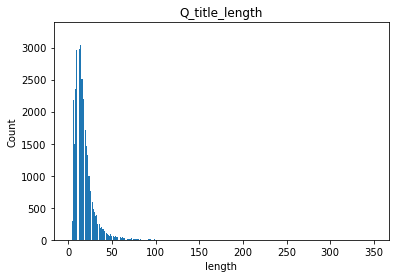

In [17]:
# Q_title 문장 길이 측정
x=set(sentence_len_df['Q_title_len'])
plot_dic_qt={}
for key in x:
    plot_dic_qt[key]=0
for num in sentence_len_df['Q_title_len']:
    plot_dic_qt[num]+=1


plt.title('Q_title_length')
plt.xlabel('length')
plt.ylabel('Count')
plt.bar(plot_dic_qt.keys(),plot_dic_qt.values())

<BarContainer object of 201 artists>

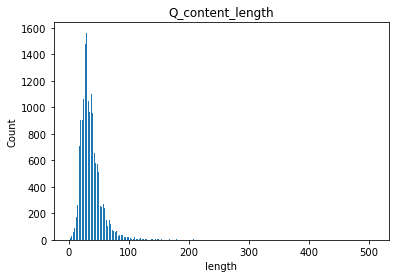

In [18]:
# Q_content 문장 길이 측정
plot_dic_qc={}
col='Q_content_len'
for i in range(len(sentence_len_df[col])):
    if sentence_len_df[col].isnull()[i]:
        continue
    plot_dic_qc[sentence_len_df.loc[i,col]]=0
    
for i in range(len(sentence_len_df[col])):
    if sentence_len_df[col].isnull()[i]:
        continue
    plot_dic_qc[sentence_len_df.loc[i,col]]+=1

plt.title(col+'gth')
plt.xlabel('length')
plt.ylabel('Count')
plt.bar(plot_dic_qc.keys(),plot_dic_qc.values())

<BarContainer object of 232 artists>

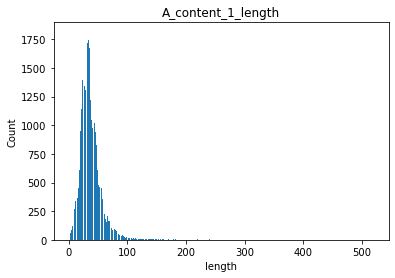

In [19]:
# A_content_1 문장 길이 측정
plot_dic_ac1={}
col='A_content_1_len'
for i in range(len(sentence_len_df[col])):
    if sentence_len_df[col].isnull()[i]:
        continue
    plot_dic_ac1[sentence_len_df.loc[i,col]]=0
    
for i in range(len(sentence_len_df[col])):
    if sentence_len_df[col].isnull()[i]:
        continue
    plot_dic_ac1[sentence_len_df.loc[i,col]]+=1

plt.title(col+'gth')
plt.xlabel('length')
plt.ylabel('Count')
plt.bar(plot_dic_ac1.keys(),plot_dic_ac1.values())

<BarContainer object of 188 artists>

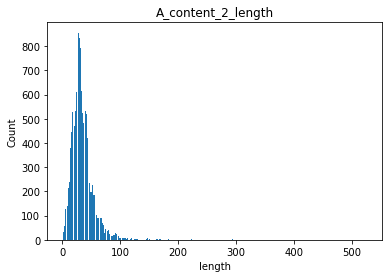

In [20]:
# A_content_2 문장 길이 측정
plot_dic_ac2={}
col='A_content_2_len'
for i in range(len(sentence_len_df[col])):
    if sentence_len_df[col].isnull()[i]:
        continue
    plot_dic_ac2[sentence_len_df.loc[i,col]]=0
    
for i in range(len(sentence_len_df[col])):
    if sentence_len_df[col].isnull()[i]:
        continue
    plot_dic_ac2[sentence_len_df.loc[i,col]]+=1

plt.title(col+'gth')
plt.xlabel('length')
plt.ylabel('Count')
plt.bar(plot_dic_ac2.keys(),plot_dic_ac2.values())

<BarContainer object of 161 artists>

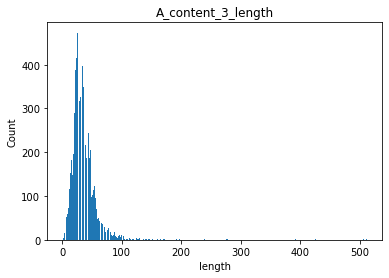

In [21]:
# A_content_3 문장 길이 측정
plot_dic_ac3={}
col='A_content_3_len'
for i in range(len(sentence_len_df[col])):
    if sentence_len_df[col].isnull()[i]:
        continue
    plot_dic_ac3[sentence_len_df.loc[i,col]]=0
    
for i in range(len(sentence_len_df[col])):
    if sentence_len_df[col].isnull()[i]:
        continue
    plot_dic_ac3[sentence_len_df.loc[i,col]]+=1

plt.title(col+'gth')
plt.xlabel('length')
plt.ylabel('Count')
plt.bar(plot_dic_ac3.keys(),plot_dic_ac3.values())

<BarContainer object of 148 artists>

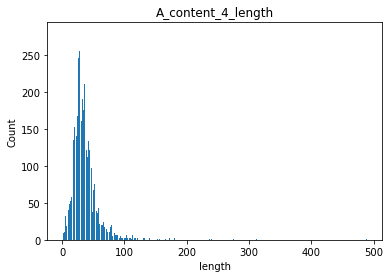

In [22]:
# A_content_4 문장 길이 측정
plot_dic_ac4={}
col='A_content_4_len'
for i in range(len(sentence_len_df[col])):
    if sentence_len_df[col].isnull()[i]:
        continue
    plot_dic_ac4[sentence_len_df.loc[i,col]]=0
    
for i in range(len(sentence_len_df[col])):
    if sentence_len_df[col].isnull()[i]:
        continue
    plot_dic_ac4[sentence_len_df.loc[i,col]]+=1

plt.title(col+'gth')
plt.xlabel('length')
plt.ylabel('Count')
plt.bar(plot_dic_ac4.keys(),plot_dic_ac4.values())

<BarContainer object of 135 artists>

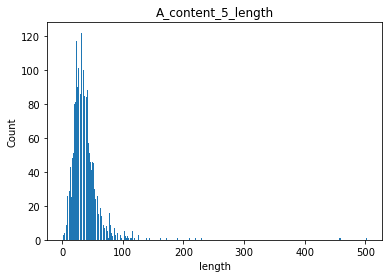

In [23]:
# A_content_5 문장 길이 측정
plot_dic_ac5={}
col='A_content_5_len'
for i in range(len(sentence_len_df[col])):
    if sentence_len_df[col].isnull()[i]:
        continue
    plot_dic_ac5[sentence_len_df.loc[i,col]]=0
    
for i in range(len(sentence_len_df[col])):
    if sentence_len_df[col].isnull()[i]:
        continue
    plot_dic_ac5[sentence_len_df.loc[i,col]]+=1

plt.title(col+'gth')
plt.xlabel('length')
plt.ylabel('Count')
plt.bar(plot_dic_ac5.keys(),plot_dic_ac5.values())

In [ ]:
import matplotlib as mpl
mpl.rcParams["font.size"] = 13
sentence_len_df=data2.iloc[:,9:16]
k=1
for col in sentence_len_df.columns:
    plot_dic={}
    for i in range(len(sentence_len_df[col])):
        if sentence_len_df[col].isnull()[i]:
            continue
        plot_dic[sentence_len_df.loc[i,col]]=0

    for i in range(len(sentence_len_df[col])):
        if sentence_len_df[col].isnull()[i]:
            continue
        plot_dic[sentence_len_df.loc[i,col]]+=1
    plt.subplot(3,3,k)
    k+=1
    plt.tight_layout()
    plt.title(col+'gth')
    plt.bar(plot_dic.keys(),plot_dic.values())
    plt.rcParams['figure.figsize'] = [15, 10]

#### outlier 제거
 1. Q_title 기준으로 제거 후 데이터 행 제거

In [24]:
# Q_title 상위 3% 제거
ranked_qt=sorted(plot_dic_qt.items(),key=(lambda x:x[0]), reverse=True)
total=0
for num, cnt in ranked_qt:
    total+=cnt
threshold_qt=total*0.03
i=0
j=0
while i<threshold_qt:
    i+=ranked_qt[j][1]
    j+=1
    key=ranked_qt[j][0]
print(f"Q_title sentence Threshold: {key}")             

Q_title sentence Threshold: 42.0


In [25]:
temp=[]
for i in range(len(data2)):
    if data2.loc[i,'Q_title_len']>42:
        temp.append(i)
        
data3=data2.drop(temp,axis=0)        
data3.reset_index(drop=True, inplace=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48947 entries, 0 to 48946
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Q_title          48947 non-null  object 
 1   Q_content        39084 non-null  object 
 2   A_content_1      48947 non-null  object 
 3   A_content_2      24171 non-null  object 
 4   A_content_3      12554 non-null  object 
 5   A_content_4      6575 non-null   object 
 6   A_content_5      3498 non-null   object 
 7   keyword          48947 non-null  object 
 8   A_content_6      1 non-null      object 
 9   Q_title_len      48947 non-null  float64
 10  Q_content_len    39084 non-null  float64
 11  A_content_1_len  48947 non-null  float64
 12  A_content_2_len  24171 non-null  float64
 13  A_content_3_len  12554 non-null  float64
 14  A_content_4_len  6575 non-null   float64
 15  A_content_5_len  3498 non-null   float64
 16  A_content_6_len  1 non-null      float64
dtypes: float64(8

In [26]:
# Q_content 상위 3% 제거
ranked_qc=sorted(plot_dic_qc.items(),key=(lambda x:x[0]), reverse=True)
total=0
for num, cnt in ranked_qc:
    total+=cnt
threshold_qc=total*0.03
i=0
j=0
while i<threshold_qc:
    i+=ranked_qc[j][1]
    j+=1
    key=ranked_qc[j][0]
print(f"Q_content sentence Threshold: {key}")             

Q_content sentence Threshold: 79.0


In [27]:
temp=[]
for i in range(len(data3)):
    if data3.loc[i,'Q_content_len']>79:
        temp.append(i)
        
data3=data3.drop(temp,axis=0)        
data3.reset_index(drop=True, inplace=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47771 entries, 0 to 47770
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Q_title          47771 non-null  object 
 1   Q_content        37908 non-null  object 
 2   A_content_1      47771 non-null  object 
 3   A_content_2      23646 non-null  object 
 4   A_content_3      12299 non-null  object 
 5   A_content_4      6434 non-null   object 
 6   A_content_5      3440 non-null   object 
 7   keyword          47771 non-null  object 
 8   A_content_6      1 non-null      object 
 9   Q_title_len      47771 non-null  float64
 10  Q_content_len    37908 non-null  float64
 11  A_content_1_len  47771 non-null  float64
 12  A_content_2_len  23646 non-null  float64
 13  A_content_3_len  12299 non-null  float64
 14  A_content_4_len  6434 non-null   float64
 15  A_content_5_len  3440 non-null   float64
 16  A_content_6_len  1 non-null      float64
dtypes: float64(8

In [28]:
# A_content_1 상위 3% 제거
ranked_ac1=sorted(plot_dic_ac1.items(),key=(lambda x:x[0]), reverse=True)
total=0
for num, cnt in ranked_ac1:
    total+=cnt
threshold_ac1=total*0.03
i=0
j=0
while i<threshold_ac1:
    i+=ranked_ac1[j][1]
    j+=1
    key=ranked_ac1[j][0]
print(f"A_content_1 sentence Threshold: {key}")             

A_content_1 sentence Threshold: 78.0


In [29]:
temp=[]
for i in range(len(data3)):
    if data3.loc[i,'A_content_1_len']>78:
        temp.append(i)
        
data3=data3.drop(temp,axis=0)        
data3.reset_index(drop=True, inplace=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46320 entries, 0 to 46319
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Q_title          46320 non-null  object 
 1   Q_content        36767 non-null  object 
 2   A_content_1      46320 non-null  object 
 3   A_content_2      22945 non-null  object 
 4   A_content_3      11949 non-null  object 
 5   A_content_4      6220 non-null   object 
 6   A_content_5      3305 non-null   object 
 7   keyword          46320 non-null  object 
 8   A_content_6      1 non-null      object 
 9   Q_title_len      46320 non-null  float64
 10  Q_content_len    36767 non-null  float64
 11  A_content_1_len  46320 non-null  float64
 12  A_content_2_len  22945 non-null  float64
 13  A_content_3_len  11949 non-null  float64
 14  A_content_4_len  6220 non-null   float64
 15  A_content_5_len  3305 non-null   float64
 16  A_content_6_len  1 non-null      float64
dtypes: float64(8

In [30]:
# A_content_2 상위 3% 제거
ranked_ac2=sorted(plot_dic_ac2.items(),key=(lambda x:x[0]), reverse=True)
total=0
for num, cnt in ranked_ac2:
    total+=cnt
threshold_ac2=total*0.03
i=0
j=0
while i<threshold_ac2:
    i+=ranked_ac2[j][1]
    j+=1
    key=ranked_ac2[j][0]
print(f"A_content_2 sentence Threshold: {key}")             

A_content_2 sentence Threshold: 76.0


In [31]:
temp=[]
for i in range(len(data3)):
    if data3.loc[i,'A_content_2_len']>76:
        temp.append(i)
        
data3=data3.drop(temp,axis=0)        
data3.reset_index(drop=True, inplace=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45634 entries, 0 to 45633
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Q_title          45634 non-null  object 
 1   Q_content        36199 non-null  object 
 2   A_content_1      45634 non-null  object 
 3   A_content_2      22259 non-null  object 
 4   A_content_3      11662 non-null  object 
 5   A_content_4      6049 non-null   object 
 6   A_content_5      3218 non-null   object 
 7   keyword          45634 non-null  object 
 8   A_content_6      1 non-null      object 
 9   Q_title_len      45634 non-null  float64
 10  Q_content_len    36199 non-null  float64
 11  A_content_1_len  45634 non-null  float64
 12  A_content_2_len  22259 non-null  float64
 13  A_content_3_len  11662 non-null  float64
 14  A_content_4_len  6049 non-null   float64
 15  A_content_5_len  3218 non-null   float64
 16  A_content_6_len  1 non-null      float64
dtypes: float64(8

In [32]:
# A_content_3 상위 3% 제거
ranked_ac3=sorted(plot_dic_ac3.items(),key=(lambda x:x[0]), reverse=True)
total=0
for num, cnt in ranked_ac3:
    total+=cnt
threshold_ac3=total*0.03
i=0
j=0
while i<threshold_ac3:
    i+=ranked_ac3[j][1]
    j+=1
    key=ranked_ac3[j][0]
print(f"A_content_3 sentence Threshold: {key}")             

A_content_3 sentence Threshold: 78.0


In [33]:
temp=[]
for i in range(len(data3)):
    if data3.loc[i,'A_content_3_len']>78:
        temp.append(i)
        
data3=data3.drop(temp,axis=0)        
data3.reset_index(drop=True, inplace=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45299 entries, 0 to 45298
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Q_title          45299 non-null  object 
 1   Q_content        35915 non-null  object 
 2   A_content_1      45299 non-null  object 
 3   A_content_2      21969 non-null  object 
 4   A_content_3      11327 non-null  object 
 5   A_content_4      5925 non-null   object 
 6   A_content_5      3141 non-null   object 
 7   keyword          45299 non-null  object 
 8   A_content_6      1 non-null      object 
 9   Q_title_len      45299 non-null  float64
 10  Q_content_len    35915 non-null  float64
 11  A_content_1_len  45299 non-null  float64
 12  A_content_2_len  21969 non-null  float64
 13  A_content_3_len  11327 non-null  float64
 14  A_content_4_len  5925 non-null   float64
 15  A_content_5_len  3141 non-null   float64
 16  A_content_6_len  1 non-null      float64
dtypes: float64(8

In [34]:
# A_content_4 상위 3% 제거
ranked_ac4=sorted(plot_dic_ac4.items(),key=(lambda x:x[0]), reverse=True)
total=0
for num, cnt in ranked_ac4:
    total+=cnt
threshold_ac4=total*0.03
i=0
j=0
while i<threshold_ac4:
    i+=ranked_ac4[j][1]
    j+=1
    key=ranked_ac4[j][0]
print(f"A_content_4 sentence Threshold: {key}")             

A_content_4 sentence Threshold: 79.0


In [35]:
temp=[]
for i in range(len(data3)):
    if data3.loc[i,'A_content_4_len']>79:
        temp.append(i)
        
data3=data3.drop(temp,axis=0)        
data3.reset_index(drop=True, inplace=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45140 entries, 0 to 45139
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Q_title          45140 non-null  object 
 1   Q_content        35785 non-null  object 
 2   A_content_1      45140 non-null  object 
 3   A_content_2      21834 non-null  object 
 4   A_content_3      11208 non-null  object 
 5   A_content_4      5766 non-null   object 
 6   A_content_5      3073 non-null   object 
 7   keyword          45140 non-null  object 
 8   A_content_6      1 non-null      object 
 9   Q_title_len      45140 non-null  float64
 10  Q_content_len    35785 non-null  float64
 11  A_content_1_len  45140 non-null  float64
 12  A_content_2_len  21834 non-null  float64
 13  A_content_3_len  11208 non-null  float64
 14  A_content_4_len  5766 non-null   float64
 15  A_content_5_len  3073 non-null   float64
 16  A_content_6_len  1 non-null      float64
dtypes: float64(8

In [36]:
# A_content_5 상위 3% 제거
ranked_ac5=sorted(plot_dic_ac5.items(),key=(lambda x:x[0]), reverse=True)
total=0
for num, cnt in ranked_ac5:
    total+=cnt
threshold_ac5=total*0.03
i=0
j=0
while i<threshold_ac5:
    i+=ranked_ac5[j][1]
    j+=1
    key=ranked_ac5[j][0]
print(f"A_content_5 sentence Threshold: {key}")             

A_content_5 sentence Threshold: 84.0


In [37]:
temp=[]
for i in range(len(data3)):
    if data3.loc[i,'A_content_5_len']>84:
        temp.append(i)
        
data3=data3.drop(temp,axis=0)        
data3.reset_index(drop=True, inplace=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45072 entries, 0 to 45071
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Q_title          45072 non-null  object 
 1   Q_content        35729 non-null  object 
 2   A_content_1      45072 non-null  object 
 3   A_content_2      21775 non-null  object 
 4   A_content_3      11155 non-null  object 
 5   A_content_4      5711 non-null   object 
 6   A_content_5      3005 non-null   object 
 7   keyword          45072 non-null  object 
 8   A_content_6      1 non-null      object 
 9   Q_title_len      45072 non-null  float64
 10  Q_content_len    35729 non-null  float64
 11  A_content_1_len  45072 non-null  float64
 12  A_content_2_len  21775 non-null  float64
 13  A_content_3_len  11155 non-null  float64
 14  A_content_4_len  5711 non-null   float64
 15  A_content_5_len  3005 non-null   float64
 16  A_content_6_len  1 non-null      float64
dtypes: float64(8

In [5]:
# threshold 바뀐 결과물 확인
import matplotlib as mpl
mpl.rcParams["font.size"] = 13
sentence_len_df=data2.iloc[:,9:16]
k=1
c= ['pink', 'tomato', 'aquamarine', 'royalblue', 'skyblue', 'mediumpurple','orange']
for j in range(len(sentence_len_df.columns)):

    plot_dic={}
    for i in range(len(sentence_len_df[sentence_len_df.columns[j]])):
        if sentence_len_df[sentence_len_df.columns[j]].isnull()[i]:
            continue
        plot_dic[sentence_len_df.loc[i,sentence_len_df.columns[j]]]=0

    for i in range(len(sentence_len_df[sentence_len_df.columns[j]])):
        if sentence_len_df[sentence_len_df.columns[j]].isnull()[i]:
            continue
        plot_dic[sentence_len_df.loc[i,sentence_len_df.columns[j]]]+=1
    plt.subplot(3,3,k)
    k+=1
    plt.tight_layout()
    plt.title(sentence_len_df.columns[j]+'gth')
    plt.bar(plot_dic.keys(),plot_dic.values(), color= c[j])
    plt.rcParams['figure.figsize'] = [15, 10]
    # plt.color = var_color_dict[var]

In [43]:
data4=data3.iloc[:,:8]

In [44]:
data4

,Q_title,Q_content,A_content_1,A_content_2,A_content_3,A_content_4,A_content_5,keyword
0,분리 불안장애 강아지,1. 분리 불안장애 심한 강아지 종류는 뭔가요?? 2. 분리 불안장애 강아지 종류...,불안장애 강아지 관계없이 타고난 성격과 주거 환경 견주나 가족들의 보육 습관으로 ...,우선 1 2번에 대해서 말씀드리자면 불안장애 강아지 종류가 아니라 강아지 한 마리...,NaN,NaN,NaN,강아지 장애
1,불안장애 강아지 잠자리 분리 질문 이용,진도 강아지 세 살 제가 외출 하울링 해서 불안장애 훈련 중인데 집 훈련이랑 잠자...,근데 잠자리 분리 훈련 시에 제 침대 올라오는 것을 아예 못하게 해야 하나요? 잘...,안녕하세요 천만 강아지 인과 함께하는 애견 동반 여행 플랫폼 하트 덕입니다. 강아...,NaN,NaN,NaN,강아지 장애
2,불안장애 강아지 새로운 강아지,4년 동안 고양이 같이 살았던 강아지 고양이 떨어지면서 불안장애 생긴 것 같아요 ...,이사하고 스트레스 보이는 강아지 지금 그 아이도 적응해야 하는데.. 새로운 아이를...,NaN,NaN,NaN,NaN,강아지 장애
3,불안장애 강아지 강아지 노즈 워크 워크 추천해주세요,NaN,산책 강아지 다리가 안 좋으면 강아지 유모차 조그이라도 자주 나가주시고요 노즈 워...,저런 여러 가지 증상이 한꺼번에 있네요 식탐은 많은가요? 노즈 워크 워크가 좋기는...,이걸로 하시면 되지 않을까 합니다 아무쪼록 건강하게 함께 오래 하시길 바라요. 펫...,NaN,NaN,강아지 장애
4,강아지 불안장애 대하여..,안녕하세요 5개월 차 미니 피숑과 함께하는 가족입니다. 저희 집식구는 5명인데 주...,안녕하세요 강아지 좋아 관련 사업을 하며 강아지 보호소 일도 도우며 후원하고 있는...,안녕하세요 강아지 강아지 대한 궁금증 해결해주는 하트 덕입니다. 강아지 훈련에는 ...,NaN,NaN,NaN,강아지 장애
...,...,...,...,...,...,...,...,...
45067,강아지 한 2달? 1달 동안 계속 습진이 안 없어져요 계속 발을 좀 심하게 핥다 ...,강아지 한 2달? 1달 동안 계속 습진이 안 없어져요 계속 발을 좀 심하게 핥다 ...,안녕하세요 지식 동물 의료 상담 활동 하고 있는 수의사 이 세원입니다. 우선 발을...,NaN,NaN,NaN,NaN,핥는 강아지
45068,강아지 얼굴 상처 저희 강아지 땅바닥이나 손 핥는 걸 좋아하는데 오늘 보니 얼굴 ...,NaN,안녕하세요 부천 하모니 동물병원 원장 하모니카입니다. 설명 내용과 사진만 보면서 ...,NaN,NaN,NaN,NaN,핥는 강아지
45069,새끼 강아지 자꾸 달려들어요.,2개월 강아지 키우고 있습니다. 가끔씩 제 다리 위에서 자기도 하고 제가 무릎 꿇...,안녕하세요 천만 강아지 인과 함께하는 애견 동반 여행 플랫폼 하트 덕입니다. 어린...,아기 강아지 들은 이갈이를 하기 때문에 그런 걸 수도 있습니다. 저도 정확한 시기...,NaN,NaN,NaN,핥는 강아지
45070,강아지 발바닥 뭔가요?,강아지 매일 발바닥 핥아요 5분 정도 계속 끊임없이 핥더라고요 그래서 발바닥 봤는...,상처가 있거나 할 수 있습니다. 자세히 살펴보시고요 혹 가시 같은 게 박혀있으면 ...,강아지 발을 핥거나 물어뜯어 면 뭐가 박혀 있거나 그게 아니면 습진 문제일 가능성...,불편 본데요? 계속 핥을 시 습진이 생길 수 있습니다.,NaN,NaN,핥는 강아지


In [45]:
data4.to_csv("dataset/final_data.csv", encoding='utf-8-sig', index=False)

### DATA mining Process

In [964]:
total_df = pd.read_csv('dataset/강아지 가족.csv', encoding = 'utf-8-sig')

In [965]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q_title      912 non-null    object
 1   Q_content    757 non-null    object
 2   A_content_1  912 non-null    object
 3   A_content_2  612 non-null    object
 4   A_content_3  367 non-null    object
 5   A_content_4  183 non-null    object
 6   A_content_5  83 non-null     object
dtypes: object(7)
memory usage: 51.5+ KB


In [966]:
total_df=total_df[['Q_content']].dropna(axis=0)

In [967]:
total_df.reset_index(drop=True, inplace=True)

In [968]:
total_df

,Q_content
0,제가 너무 스트레스 받아서 제가 이상한건지 여쭤봅니다처음 강아지 입양 했을때 물론 ...
1,저는 8년동안 페키니즈를 키우고 있습니다.저희 페키는 배변훈련을 어렸을때부터 해서 ...
2,"안녕하세요 강아지 1인 가족 일 시, 잘 키울 수 있는 방법? (강아지 훈련 이나 ..."
3,어머니가 약 3달 전에 아기 강아지를 80만원 가량을 지불하고 데려오셨습니다. 저희...
4,안녕하세요 제가 진짜로 예전 부터 강아지를 엄청 좋아했는데요...그런데못 키우는 이...
...,...
752,안녕하세요 6개월된 남아 말티즈 키우는 대학생입니다. 이 아이를 데려온지 4개월이 ...
753,안녕하세요 저는 미니어쳐 푸들을 키우고 있는 고등학생입니다. 다름이 아니라 저희...
754,혹시 강아지 입양처 구하고 계시는 분 있으면 댓 달아주세요 저희는 4인가족이고 강아...
755,안녕하세요평범한 소녀입니다ㅋ강아지를 키우려는데 첨이거든요;;그래서 뭐를 사야할지 어...


### 데이터 품사 분류

In [969]:
for i in range(len(total_df['Q_content'])):
    try:
        norm = re.compile('[가-힣|0-9|.|?]+').findall(total_df.loc[i,'Q_content'])
        st = ' '.join(norm)
        st2 = spell_checker.check(st)
        total_df.loc[i,'Q_content']=st2[2]
    except:
        print(i)

In [970]:
komoran=Komoran()
total_df['Q_title_pos']=total_df['Q_content'].map(lambda x: komoran.pos(x))

In [971]:
print(total_df['Q_title_pos'][1])

[('저', 'NP'), ('는', 'JX'), ('8', 'SN'), ('년', 'NNB'), ('동안', 'NNG'), ('페키니즈', 'NNP'), ('를', 'JKO'), ('키우', 'VV'), ('고', 'EC'), ('있', 'VX'), ('습니다', 'EF'), ('.', 'SF'), ('저희', 'NP'), ('페리', 'NNP'), ('는', 'JX'), ('배변', 'NNP'), ('훈련', 'NNG'), ('을', 'JKO'), ('어리', 'VA'), ('었', 'EP'), ('을', 'ETM'), ('때', 'NNG'), ('부터', 'JX'), ('하', 'VV'), ('아서', 'EC'), ('애견', 'NNG'), ('카페나', 'NNP'), ('다른', 'MM'), ('곳', 'NNG'), ('을', 'JKO'), ('가도', 'NNP'), ('배변', 'NNP'), ('패드', 'NNP'), ('에', 'JKB'), ('잘', 'MAG'), ('볼일', 'NNG'), ('을', 'JKO'), ('보', 'VV'), ('았', 'EP'), ('는데', 'EC'), ('이사', 'NNG'), ('오', 'VV'), ('고', 'EC'), ('몇', 'MM'), ('달', 'NNG'), ('이', 'JKS'), ('지나', 'VV'), ('니까', 'EC'), ('애가', 'NNP'), ('계속', 'MAG'), ('자기', 'NP'), ('화장실', 'NNG'), ('에서', 'JKB'), ('변', 'NNG'), ('을', 'JKO'), ('보', 'VV'), ('지', 'EC'), ('않', 'VX'), ('습니다', 'EF'), ('.', 'SF'), ('저희', 'NP'), ('가족', 'NNG'), ('화장실', 'NNP'), ('바로', 'MAG'), ('옆', 'NNG'), ('에', 'JKB'), ('강아지', 'NNP'), ('화장실', 'NNG'), ('이', 'JKS'), ('있', 'VV'), ('는데', '

### 사전에 있는 단어 호출

In [972]:
df_dictionary=pd.read_csv("voca_dictionary.csv", encoding='utf-8-sig', index_col=0)

In [973]:
checking=''
for st in df_dictionary.values:
    checking+=' '+st[0]
for st in df_dictionary.index:
    checking+=' '+st

### 데이터 내 명사와 사전 내 명사 중 일치 하지 않은 것 추출

In [974]:
cnt_noum={}
cnt_n_data={}
for i in range(len(total_df['Q_title_pos'])):
    for st, ty in total_df.loc[i,'Q_title_pos']:
        if st in checking.split():
            continue
            
        if ty[0]=='N':
            
            
            if len(st) not in cnt_noum.keys():
                print(st)
                cnt_noum[len(st)]=0
                cnt_n_data[len(st)]=[st]
            else:
                cnt_noum[len(st)]+=1
                if st not in cnt_n_data[len(st)]: # 중복제거
                    cnt_n_data[len(st)].append(st)
cnt_noum=sorted(cnt_noum.items())
cnt_n_data=sorted(cnt_n_data.items())

저
페리
카페나
안녕하세요
바이러스
낑낑거렸었고
펫숍의였습니다.
스테레스받을낀봐어쩌죠..어제
그럼에도 불구하고
옭...욹...짖어도
보스턴 테리어


In [975]:
cnt_noum

[(1, 5307),
 (2, 4721),
 (3, 854),
 (4, 217),
 (5, 173),
 (6, 36),
 (7, 4),
 (8, 3),
 (9, 1),
 (11, 2),
 (15, 0)]

In [976]:
# 명사가 1개짜리는 의미 파악이 어려움
print(cnt_n_data[0])

(1, ['저', '년', '때', '곳', '달', '변', '옆', '문', '수', '시', '것', '점', '중', '밤', '잠', '게', '자', '건', '안', '강', '그', '뭐', '분', '땜', '글', '집', '거', '지', '번', '개', '살', '맘', '피', '날', '꿈', '견', '명', '둘', '미', '발', '이', '내', '공', '쯤', '일', '암', '예', '애', '밖', '포', '현', '경', '눈', '반', '록', '밥', '전', '앞', '말', '나', '물', '등', '텐', '털', '척', '러', '더', '적', '킥', '짓', '밑', '너', '면', '외', '형', '욕', '켄', '넬', '모', '뼈', '족', '놈', '쪽', '도', '몸', '돈', '머', '순', '화', '팔', '위', '귀', '못', '꽃', '약', '창', '열', '조', '듯', '복', '티', '요', '만', '주', '코', '절', '품', '얘', '션', '겁', '길', '펜', '독', '맛', '뒤', '처', '박', '숏', '껌', '즘', '뭄', '담', '한', '땅', '후', '당', '배', '식', '장', '어', '떡', '댐', '염', '음', '남', '상', '끝', '바', '간', '종', '대', '업', '아', '알', '하', '새', '첨', '사', '흥', '부', '비', '다', '동', '젤', '힘', '빡', '세', '감', '무', '닭', '원', '딸', '막', '둥', '파', '양', '속', '습', '법', '엽', '쥐', '찌', '책', '누', '뿐', '터', '차', '삼', '디', '신', '씨', '왕', '을', '란', '낮', '정', '겉', '유', '답', '옷', '입', '재', '질', '송', '편', '히', '병', '금', '셋', 

In [977]:
# 명사가 2개짜리 부터 의미 파악이 용이
print(cnt_n_data[1])

(2, ['페리', '가도', '볼일', '이사', '애가', '자기', '모두', '등등', '음식', '수면', '확진', '자와', '접촉', '격리', '기간', '전파', '전염', '감사', '공부', '허락', '설득', '적응', '지도', '평소', '출근', '분리', '주말', '평일', '저녁', '제가', '늑대', '순간', '오빠', '이해', '이것', '사회', '부족', '알파', '판단', '교정', '사인', '입양', '이서', '대우', '리다', '현관', '혼란', '질투', '인사', '두발', '대응', '이랑', '리제', '마린', '호텔', '숙박', '부탁', '가요', '올해', '학년', '제로', '기역', '가정', '부양', '해서', '제일', '그때', '이제', '아비', '신체', '해고', '마리', '학생', '데리', '펫숍', '추정', '크림', '시기', '성격', '고자', '생일', '고요', '자신', '메일', '확인', '본가', '환경', '필요', '각자', '이웃', '안방', '자리', '한곳', '새벽', '도어', '번호', '남이', '특정', '지금', '외출', '얼마', '동시', '대화', '앞발', '지혈', '재촉', '난리', '심해', '절대', '약주', '침대', '계단', '구역', '생명', '녀석', '주인', '싸움', '요한', '무리', '서열', '인지', '반대', '옛날', '눈병', '개요', '입장', '나이', '브리', '그쪽', '보드', '제품', '족발', '버릇', '친척', '방식', '화병', '나물', '주먹', '발각', '정상', '조치', '이브', '남편', '셀프', '지역', '강남', '강북', '무지', '규모', '거기', '설명', '사실', '보니', '안전', '자란', '농장', '형제', '하진', '종류', '숯불', '크기', '하나', '고민', '성별', '경로', '대구',

In [978]:
# 명사 3개짜리
print(cnt_n_data[2])

(3, ['카페나', '화장실', '페기가', '환풍기', '유도제', '코로나', '매개체', '시간대', '아오이', '하울링', '피숑을', '증후군', '책임감', '불안증', '사진관', '해주시', '서울로', '구성원', '뒷다리', '고 온', '원숭이', '펫숍을', '살다가', '월요일', '할머니', '팔베개', '오른쪽', '이동하', '피부병', '사각형', '앞으로', '기생충', '맞벌이', '아무도', '해결책', '보호소', '뒷모습', '그리워', '수성구', '컨트롤', '인터넷', '신발장', '컴퓨터', '아토피', '목초액', '중학교', '제스처', '으르렁', '출퇴근', '발가락', '정도전', '지난주', '핸드폰', '강원도', '어르신', '분위기', '수영장', '캠핑장', '이무기', '귀여움', '문제점', '현관문', '기지개', '우울증', '장난감', '마스크', '괜스레', '기싸움', '여학생', '개새끼', '그런지', '언니네', '여주시', '지난번', '아이들', '어젯밤', '무작위', '대리석', '미끄럼', '이야기', '사하구', '코오롱', '다음날', '빠삐용', '대소변', '잠자리', '눈시울', '여행지', '수술비', '딴사람', '큰언니', '반대쪽', '바닷가', '마르고', '아무것', '남자들', '발소리', '발자국', '대부분', '한가지', '나머지', '세탁소', '똥오줌', '오랜만', '네이버', '상대방', '사이버', '방지기', '금요일', '경험자', '신경질', '아지만', '미성년', '초인종', '발바닥', '말싸움', '식분증', '파이팅', '평상시', '타당성', '중학생', '선생님', '축농증', '아무개', '제자리', '한자리', '사무실', '그 후', '이뻐요', '아랫집', '신문지', '안통핮', '아이와', '노른자', '아파서', '물놀이', '좋아서', '항생제', '플러그', '미용실', '어리광', '경선자', '

In [979]:
# 명사 4개짜리
print(cnt_n_data[3])

(4, ['바이러스', '가족사진', '메이크업', '앟했대요', '펫숍에서', '스테레스', '초등학교', '여기저기', '펫샵으로', '그 여자', '할아버지', '스튜디오', '펫샵에서', '학교 3', '스트레스', '어린아이', '다롱이만', '다롱이가', '다롱이는', '이뻐해요', '이뻐하고', '해외여행', '어버이날', '어린이날', '몰래뎃고', '블루베리', '아침저녁', '찝찝하고', '이뻐하면', '가족회의', '동물보호', '작은언니', '지하철역', '고등학교', '고등학생', '이만저만', '하루아침', '사랑으로', '남자친구', '먹을거리', '이뻐하죠', '얼마죠?', '이곳저곳', '아이디어', '마운팅?', '줄기세포', '좋은 날', '눴다는데', '애완동물', '마찬가지', '3개월령', '으르렁할', '어른돠면', '이뻐해서', '불량가족', '이 문자', '마음고생', '피숑으로', '애걸복걸', '사다 주', '에게 해', '프로그램', '빙글빙글', '펫샵이나', '갇어놔요', '학교 2', '말하자면', '울음소리', '교통사고', '하늘나라', '스프레이', '일상생활', '큰아버지', '페이스북', '눴었어요', '아주머니', '걱정거리', '컨테이너', '장래희망', '동고동락', '페트병에'])


In [980]:
# 명사 5개 이상짜리
for i in range(4,100):
    try:
        print(cnt_n_data[i])
    except: 
        print("없음")
        break

(5, ['안녕하세요', '어돟게하몬', '5월 1일', '낯선 사람', '크리스마스', '더 가까이', '아빠 언니', '부산광역시', '새벽 1시', '물어띁어서', '8월 4일', '신고합니다', '이뻐하시는', '5월 8일', '뼛조각이랑', '풀어줬늠데', '사랑합니다', '애굣덩이에', '처음이라서', '심슨 가족', '가스레인지', '폼피츠인데', '9월 5일', '하면 된다', '티웨이항공', '하즤만..', '에견샵에서'])
(6, ['낑낑거렸었고', '돌아올뗴마다', '부담?스러울', '강아지 공장', '으르렁거려서', '으르렁합니다', '으르렁거려요', '던젔어요저두', '했슴다그런데', '눌린걱같구여', '으르렁댔는데', '엄마와 아빠', '으릉렁거리며', '싶으데...', '이뻐했었어요', '으르렁하거나', '알고 싶어요', '가족의 탄생', '1월 19일', '8월 10일', '1월 11일', '7월 28일', '우리 아버지', '프레젠테이션'])
(7, ['보스턴 테리어', '썻죠..그런뎅', '대답해 주세요', '자꾸낑깅댄다고'])
(8, ['펫숍의였습니다.', '잭 러셀 테리어', '2007년 6월', '질문드려요펫샵은'])
(9, ['그럼에도 불구하고', '도와주셍됴지식인들'])
(11, ['옭...욹...짖어도', '괜찮을까요??케어하는', '헀는데...어제밤에는'])
(15, ['스테레스받을낀봐어쩌죠..어제'])
없음


### 이 키워드 내 데이터에서 명사 길이 확인 해보기

In [981]:
cnt_noum={}
cnt_n_data={}
for i in range(len(total_df['Q_title_pos'])):
    for st, ty in total_df.loc[i,'Q_title_pos']:
        if ty[0]=='N':
            if len(st) not in cnt_noum.keys():
                cnt_noum[len(st)]=0
                cnt_n_data[len(st)]=[st]
            else:
                cnt_noum[len(st)]+=1
                if st not in cnt_n_data[len(st)]: # 중복제거
                    cnt_n_data[len(st)].append(st)
cnt_noum=sorted(cnt_noum.items())
cnt_n_data=sorted(cnt_n_data.items())

In [982]:
cnt_noum

[(1, 5497),
 (2, 10537),
 (3, 2881),
 (4, 278),
 (5, 187),
 (6, 36),
 (7, 4),
 (8, 3),
 (9, 1),
 (11, 2),
 (15, 0)]

In [983]:
# 명사가 1개짜리는 의미 파악이 어려움
print(cnt_n_data[0])

(1, ['저', '년', '때', '곳', '달', '변', '옆', '문', '수', '똥', '시', '것', '점', '중', '밤', '잠', '게', '자', '건', '안', '강', '그', '뭐', '분', '땜', '글', '집', '거', '지', '방', '번', '개', '살', '손', '데', '맘', '피', '날', '꿈', '견', '명', '둘', '미', '발', '이', '내', '공', '쯤', '일', '암', '예', '애', '밖', '포', '현', '경', '눈', '반', '록', '밥', '전', '앞', '말', '나', '물', '등', '텐', '털', '척', '러', '더', '적', '킥', '짓', '밑', '너', '면', '외', '형', '욕', '켄', '넬', '모', '뼈', '족', '놈', '쪽', '도', '몸', '돈', '머', '순', '화', '팔', '위', '귀', '못', '꽃', '약', '창', '열', '조', '듯', '복', '티', '요', '만', '주', '코', '절', '품', '얘', '션', '겁', '길', '펜', '독', '맛', '뒤', '처', '박', '숏', '껌', '즘', '뭄', '담', '한', '땅', '후', '당', '배', '식', '장', '어', '떡', '댐', '염', '음', '남', '상', '끝', '숍', '바', '간', '종', '대', '업', '아', '알', '하', '새', '첨', '사', '흥', '부', '비', '다', '동', '젤', '힘', '빡', '세', '감', '무', '닭', '원', '딸', '막', '둥', '파', '양', '속', '습', '법', '엽', '쥐', '찌', '책', '누', '뿐', '터', '차', '삼', '디', '신', '씨', '왕', '을', '란', '낮', '정', '겉', '유', '틱', '답', '옷', '입', '재', '질', 

In [984]:
# 명사가 2개짜리 부터 의미 파악이 용이
print(cnt_n_data[1])

(2, ['동안', '저희', '페리', '배변', '훈련', '애견', '가도', '패드', '볼일', '이사', '애가', '자기', '가족', '사랑', '냄새', '모두', '창문', '질문', '이유', '이거', '방법', '영양', '도움', '사료', '간식', '추천', '등등', '주의', '암컷', '성화', '수술', '음식', '수면', '엄마', '확진', '자와', '접촉', '격리', '기간', '전파', '걱정', '전염', '감사', '공부', '허락', '설득', '원래', '적응', '아침', '오늘', '불안', '지도', '평소', '출근', '시간', '그것', '분리', '교육', '학교', '주말', '평일', '저녁', '제가', '늑대', '순간', '아빠', '오빠', '이해', '산책', '장난', '사람', '경우', '꼬리', '이것', '해결', '다리', '아이', '사회', '부족', '알파', '판단', '증상', '문제', '교정', '사인', '유기', '입양', '개월', '정도', '이서', '거리', '대우', '생각', '이름', '리다', '현관', '혼란', '질투', '인사', '두발', '대응', '이랑', '여행', '리제', '마린', '호텔', '동반', '숙박', '부탁', '가요', '올해', '학년', '방학', '제로', '동물', '기역', '그림', '푸들', '가정', '부양', '해서', '제일', '처음', '그때', '목줄', '이후', '동생', '이제', '아비', '신체', '해고', '마리', '소변', '대변', '예방', '접종', '학생', '데리', '펫숍', '분양', '당시', '추정', '크림', '시기', '성격', '고자', '근처', '생일', '고요', '자신', '메일', '답변', '확인', '사진', '본가', '부모', '행동', '환경', '병원', '필요', '여자', '무시', '혼자', '재롱', '각자', '소리',

In [985]:
# 명사 3개짜리
print(cnt_n_data[2])

(3, ['카페나', '화장실', '강아지', '페기가', '환풍기', '마지막', '유도제', '코로나', '매개체', '시간대', '아오이', '하울링', '피숑을', '증후군', '책임감', '불안증', '사진관', '해주시', '서울로', '제주도', '구성원', '남동생', '뒷다리', '고양이', '고 온', '원숭이', '펫숍을', '지식인', '살다가', '월요일', '여러분', '할머니', '몰티즈', '팔베개', '밥그릇', '목소리', '오른쪽', '이동하', '피부병', '사각형', '앞으로', '진돗개', '기생충', '아파트', '맞벌이', '아무도', '해결책', '보호소', '뒷모습', '그리워', '수성구', '컨트롤', '아버지', '인터넷', '신발장', '컴퓨터', '아토피', '목초액', '중학교', '제스처', '으르렁', '어머니', '출퇴근', '발가락', '치와와', '정도전', '지난주', '핸드폰', '강원도', '어르신', '분위기', '수영장', '캠핑장', '스피츠', '이무기', '귀여움', '문제점', '공격성', '현관문', '기지개', '우울증', '장난감', '마스크', '괜스레', '아저씨', '기싸움', '훈련법', '여학생', '개새끼', '그런지', '일주일', '언니네', '여주시', '지난번', '여동생', '아이들', '어젯밤', '무작위', '대리석', '미끄럼', '이야기', '사하구', '코오롱', '다음날', '빠삐용', '대소변', '잠자리', '요크셔', '눈시울', '시바견', '여행지', '수술비', '딴사람', '큰언니', '반대쪽', '바닷가', '마르고', '아무것', '남자들', '발소리', '발자국', '대부분', '한가지', '나머지', '세탁소', '똥오줌', '오랜만', '네이버', '상대방', '사이버', '방지기', '금요일', '경험자', '신경질', '아지만', '미성년', '초인종', '발바닥', '말싸움', '식분증', '파이팅', '평상시', '

In [986]:
# 명사 4개짜리
print(cnt_n_data[3])

(4, ['페키니즈', '바이러스', '가족사진', '메이크업', '앟했대요', '펫숍에서', '스테레스', '초등학교', '여기저기', '펫샵으로', '초등학생', '그 여자', '할아버지', '스튜디오', '펫샵에서', '동물병원', '학교 3', '스트레스', '잉글리시', '어린아이', '다롱이만', '다롱이가', '다롱이는', '이뻐해요', '이뻐하고', '오랫동안', '해외여행', '어버이날', '어린이날', '몰래뎃고', '슈나우저', '닥스훈트', '블루베리', '아침저녁', '찝찝하고', '이뻐하면', '가족회의', '동물보호', '알레르기', '작은언니', '지하철역', '고등학교', '고등학생', '이만저만', '하루아침', '사랑으로', '남자친구', '먹을거리', '이뻐하죠', '얼마죠?', '이곳저곳', '아이디어', '마운팅?', '줄기세포', '좋은 날', '눴다는데', '애완동물', '마찬가지', '3개월령', '으르렁할', '어른돠면', '이뻐해서', '불량가족', '이 문자', '트라우마', '마음고생', '피숑으로', '애걸복걸', '사다 주', '에게 해', '프로그램', '빙글빙글', '펫샵이나', '갇어놔요', '학교 2', '말하자면', '사모예드', '울음소리', '교통사고', '하늘나라', '스프레이', '일상생활', '큰아버지', '페이스북', '눴었어요', '아주머니', '걱정거리', '컨테이너', '쓰레기통', '장래희망', '동고동락', '페트병에'])


In [987]:
# 명사 5개짜리
print(cnt_n_data[4])

(5, ['안녕하세요', '포메라니안', '어돟게하몬', '5월 1일', '낯선 사람', '크리스마스', '더 가까이', '아빠 언니', '부산광역시', '새벽 1시', '물어띁어서', '8월 4일', '비숑프리제', '신고합니다', '이뻐하시는', '5월 8일', '뼛조각이랑', '풀어줬늠데', '사랑합니다', '애굣덩이에', '처음이라서', '심슨 가족', '가스레인지', '폼피츠인데', '9월 5일', '하면 된다', '티웨이항공', '하즤만..', '에견샵에서'])


In [988]:
# 명사 6개 이상짜리
for i in range(5,100):
    try:
        print(cnt_n_data[i])
    except: 
        print("없음")
        break

(6, ['낑낑거렸었고', '돌아올뗴마다', '부담?스러울', '강아지 공장', '으르렁거려서', '으르렁합니다', '으르렁거려요', '던젔어요저두', '했슴다그런데', '눌린걱같구여', '으르렁댔는데', '엄마와 아빠', '으릉렁거리며', '싶으데...', '이뻐했었어요', '으르렁하거나', '알고 싶어요', '가족의 탄생', '1월 19일', '8월 10일', '1월 11일', '7월 28일', '우리 아버지', '프레젠테이션'])
(7, ['보스턴 테리어', '썻죠..그런뎅', '대답해 주세요', '자꾸낑깅댄다고'])
(8, ['펫숍의였습니다.', '잭 러셀 테리어', '2007년 6월', '질문드려요펫샵은'])
(9, ['그럼에도 불구하고', '도와주셍됴지식인들'])
(11, ['옭...욹...짖어도', '괜찮을까요??케어하는', '헀는데...어제밤에는'])
(15, ['스테레스받을낀봐어쩌죠..어제'])
없음


### 이 키워드 내 데이터에서 동사, 형용사 길이 확인 해보기

In [989]:
cnt_v={}
cnt_v_data={}
for i in range(len(total_df['Q_title_pos'])):
    for st, ty in total_df.loc[i,'Q_title_pos']:
        if ty[0]=='V':
            if len(st) not in cnt_v.keys():
                cnt_v[len(st)]=0
                cnt_v_data[len(st)]=[st]
            else:
                cnt_v[len(st)]+=1
                if st not in cnt_v_data[len(st)]:  # 중복제거
                    cnt_v_data[len(st)].append(st)
cnt_v=sorted(cnt_v.items())
cnt_v_data=sorted(cnt_v_data.items())

In [990]:
# 동사도 마찬가지로 한글자는 의미가 없는거 같음
print(cnt_v_data[0])

(1, ['있', '하', '보', '오', '않', '열', '놓', '없', '나', '가', '틀', '이', '되', '같', '말', '알', '주', '지', '늦', '걸', '살', '짖', '치', '놀', '눕', '물', '뛰', '묻', '들', '씹', '세', '많', '싶', '좋', '막', '맞', '찍', '트', '집', '서', '접', '넘', '메', '떨', '잡', '먹', '받', '닫', '짓', '자', '작', '내', '대', '남', '듣', '뿜', '까', '적', '울', '풀', '뜯', '춥', '붙', '누', '찾', '타', '쪼', '맡', '씻', '밀', '크', '맵', '불', '낳', '쏟', '팔', '앉', '슬', '숨', '닦', '떼', '핥', '쌓', '달', '사', '쓰', '넓', '벗', '검', '덜', '갖', '잇', '덮', '두', '켜', '파', '싫', '멀', '좁', '싸', '죽', '읽', '쉬', '높', '펴', '쉽', '끼', '옮', '안', '낮', '믿', '긁', '비', '뺏', '길', '빼', '입', '빨', '돌', '꾸', '몰', '깔', '갈', '깨', '식', '삼', '시', '낫', '벌', '털', '깎', '돕', '굶', '밟', '웃', '줄', '꼬', '끄', '쫓', '줏', '걷', '얼', '넣', '뜨', '꽂', '늘', '담', '참', '짧', '뽑', '볶', '줍', '짜', '얻', '졸', '차', '묶', '짙', '잊', '피', '튀', '추', '째', '잃', '겪', '갉', '감', '데', '굳', '밝', '끊', '빗', '밉', '모', '절', '꼽', '패', '굴', '엎', '깊'])


In [991]:
print(cnt_v_data[1])

(2, ['키우', '어리', '지나', '빠지', '괴롭', '이렇', '고치', '잘나', '인하', '여쭈', '걸리', '알리', '어떻', '나가', '모르', '그렇', '시키', '심하', '보이', '나오', '친하', '물리', '만나', '흔들', '반기', '계시', '만지', '아니', '못하', '부르', '새롭', '데리', '싸우', '지내', '느끼', '밀치', '드리', '나서', '건지', '괜찮', '가리', '기르', '날뛰', '남기', '다치', '비치', '지키', '올리', '피우', '부리', '피하', '화내', '다니', '생기', '누르', '저렇', '멈추', '아프', '둥글', '힘들', '정하', '여기', '날리', '원하', '혼내', '어렵', '걸치', '안기', '향하', '슬프', '그립', '마르', '맛있', '놀라', '먹이', '토하', '만들', '때리', '던지', '이르', '대하', '통하', '귀하', '아끼', '삼키', '자라', '외롭', '택하', '조르', '약하', '구하', '따르', '박히', '병들', '무섭', '줄이', '취하', '어쩌', '돌보', '바쁘', '이쁘', '버리', '피나', '맡기', '비싸', '모시', '깨물', '강하', '바라', '보내', '미치', '사납', '거리', '순하', '씻기', '귀찮', '치우', '덤비', '비우', '내밀', '가지', '재밌', '옮기', '편하', '가시', '지르', '채우', '손대', '모이', '나쁘', '다르', '버티', '그러', '숨기', '낯설', '거들', '욕먹', '저러', '잡히', '딱하', '해보', '뒤돌', '똑같', '어둡', '가하', '급하', '찢기', '죽이', '살리', '귀엽', '마시', '상하', '지겹', '관하', '반갑', '들리', '잠들', '깨우', '달리', '빠르', '바뀌', '팔리', '재우', '모으', '끝나', '먹히',

In [992]:
print(cnt_v_data[2])

(3, ['들어가', '도와주', '달려들', '좋아하', '지나가', '일어나', '달려오', '싫어하', '돌아가', '안타깝', '다가오', '데려오', '뒤척이', '쫓아오', '들어오', '책임지', '놓아두', '가르치', '알아보', '내려가', '낑낑대', '달려가', '따라가', '돌아오', '속상하', '기다리', '떨어지', '태어나', '다가가', '주무시', '간지럽', '쓰다듬', '찢어지', '엄청나', '찡그리', '받아먹', '상관없', '망설이', '간추리', '오래되', '뛰어놀', '건드리', '덤벼들', '매달리', '어떡하', '장난치', '내버리', '욕심내', '가져오', '잡아먹', '물어보', '데려가', '기억나', '따돌리', '괴롭히', '사이좋', '넘어오', '늘어나', '사라지', '따라오', '헤어지', '붉어지', '구석지', '올라가', '날카롭', '보아주', '몰라주', '넘어가', '도망가', '다녀오', '냄새나', '주워듣', '머무르', '얻어맞', '주고받', '시끄럽', '나아지', '물어뜯', '움직이', '달라지', '어울리', '유별나', '눌러앉', '알아채', '떠나가', '찾아오', '올라오', '소용없', '가져가', '슬퍼하', '뛰어오', '일어서', '안쓰럽', '엎드리', '살아나', '징그럽', '흐느끼', '끙끙대', '내려놓', '한눈팔', '내보내', '쪼그맣', '조그맣', '기뻐하', '게으르', '찾아보', '나타나', '올려놓', '둘러보', '아무렇', '바라보', '가로막', '지나치', '길들이', '쳐다보', '마주치', '알아듣', '쪼끄맣', '돌아서', '보살피', '드러내', '끼어들', '날아가', '깨어나', '드나들', '어이없', '살아가', '풀어놓', '들어주', '오래가', '쫓겨나', '생각나', '문제없', '두드리', '쫓아가', '들어서', '부딪히', '뛰어들', '소리치', '싸지르', '미워하', '돌려받', '

In [993]:
print(cnt_v_data[3])

(4, ['낑낑거리', '잡아당기', '반가워하', '으르렁대', '떨어뜨리', '돌아다니', '그리워하', '무서워하', '받아들이', '귀여워하', '뛰어나오', '미끄러지', '뛰쳐나가', '괴로워하', '갑작스럽', '쫓아다니', '알아차리', '잃어버리', '따라다니', '아른거리', '뛰어나가', '뛰어다니', '두려워하', '잊어버리', '끙끙거리', '칭얼거리', '끌어당기', '흘러나오'])


In [994]:
# 5개 이상짜리
for i in range(4,100):
    try:
        print(cnt_v_data[i])
    except: 
        print("없음")
        break

(5, ['으르렁거리'])
(6, ['안절부절못하'])
없음
